In [27]:
# Initialize Otter
import otter

grader = otter.Notebook("06-exercise-pids2024.ipynb")

# Exercise sheet 6
**Hello everyone!**

# Points: 15

Topics of this exercise sheet are:
* Working with probability distributions


Please let us know if you have questions or problems! <br>
Contact us during the exercise session or on [Piazza](https://piazza.com/unibas.ch/spring2024/63982).

**Automatic Feedback**

This notebook can be automatically graded using Otter grader. To find how many points you get, simply run `grader.check_all()` from a new cell. 

## Introduction:
This exercise is designed to help you become familiar with the fundamental concepts of probability and statistics. To ensure that you have a strong grasp of these concepts, we recommend reading this article:
https://towardsdatascience.com/an-in-depth-crash-course-on-random-variables-a3905d03e322

In [28]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats

print(
    pd.__version__,
    sns.__version__,
    type(plt),
    np.__version__,
    scipy.__version__,
    type(stats),
)

2.0.3 0.12.2 <class 'module'> 1.24.3 1.10.1 <class 'module'>


## Question 1 (6 points)

### Binomial distribution:
The binomial distribution with parameters $n$ and $p$ is a class of the discrete probability distributions of <b> the number of successes in a sequence of $n$ independent experiments, </b> each asking a yes–no question, and each with its own Boolean-valued outcome: success (with probability $p$) or failure (with probability $1 − p$). Let $X$ denote a random variable with binomial distribution. The probability of having $x$ times a success in $n$ trials, is:
$$
    p(x) = \binom{n}{x}p^x (1-p)^{n-x} 
$$

In [29]:
n = 20  # The total number of trials
p = 0.5  # The probability of success in each trial
X = stats.binom(n, p)
# Please check this page for more information: 
# https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.stats.binom.html#scipy.stats.binom

### 1a) (1 point)
Make a visual representation of the binomial distribution.
To do that, generate 10,000 independent realizations of the random variable $X$. These 10,000 samples will be distributed as a binomial distribution with parameters $p=0.5$ and $n=20$. 
**Save the samples in a variable named 'x'**.

In other words, this is equivalent to reproduce 10,000 independent experiments, where each experiment consists of flipping 20 coins and counting the number of times it hit 'tails' or 'heads'.

Plot a histogram of the generated samples.

Hint: You can use "X.rvs(...)" to generate independent samples from the random variable $X$.

(10000, 2)


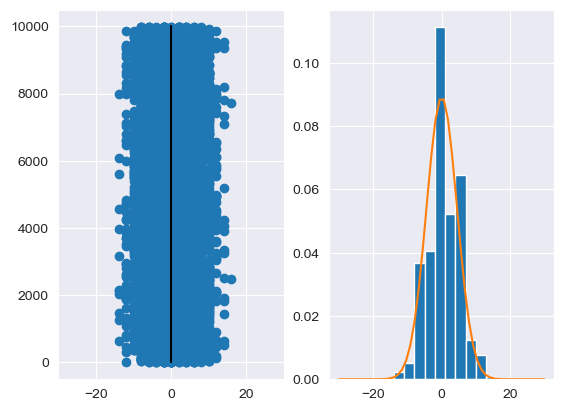

In [30]:
def draw_scene(player_pos, n_samples: int, n_experiments: int):
    pitch_start = -30
    pitch_end = 30
    fig, (ax0, ax1) = plt.subplots(1, 2)
    ax0.scatter(player_pos[:, 0], player_pos[:, 1])
    ax0.plot([0, 0], [0, n_samples], 'k-')
    ax0.set_xlim([pitch_start, pitch_end])

    ax1.hist(player_pos[:, 0], density=True)
    xs = np.linspace(pitch_start, pitch_end)
    ax1.plot(xs, scipy.stats.norm(0, math.sqrt(n_experiments)).pdf(xs))


def draw_histogram(n_samples: int, n_experiments: int):
    sample_pos = np.array([(0, i) for i in range(0, n_samples)])
    print(sample_pos.shape)
    for i in range(0, n_experiments):
        for j in range(0, n_samples):
            pos_update = 1 if np.random.randint(0, 2) == 1 else -1
            sample_pos[j, 0] = sample_pos[j, 0] + pos_update

    draw_scene(sample_pos, n_samples, n_experiments)


class Question1a:
    n_samples = 10000
    np.random.seed(0)

    x = X.rvs(size=n_samples)
    draw_histogram(n_samples, n)


Question1a()

In [31]:
grader.check("Question 1a")

Question 1a results: All test cases passed!

### 1b (1 point)
Calculate the probabilities $\text{P}(X = 8)$, $\text{P}(X = 10)$ and $\text{P}(X = 12)$ and store them in the variables 'p8', 'p10', and 'p12', respectively.

Hint: Use X.pmf()

In [32]:
class Question1b:
    p8 = X.pmf(8)
    p10 = X.pmf(10)
    p12 = X.pmf(12)
    print(
        'P(X=8)={:.4f} \nP(X=10)={:.4f} \nP(X=12)={:.4f}'.format(p8, p10, p12)
    )

P(X=8)=0.1201 
P(X=10)=0.1762 
P(X=12)=0.1201


In [33]:
grader.check("Question 1b")

Question 1b results: All test cases passed!

Which point has the highest probability? Why?

Your answer: P(X=10) as it is the median of the distribution.


### 1c (1 point)
Calculate the probabilities $\text{P}(X \leq 8)$, $\text{P}(X \leq 10)$, $\text{P}(X \leq 12)$ and $\text{P}(X \leq 20)$ and store them in the variables 'p_le8', 'p_le10', 'p_le12' and 'p_le20' respectively.

Hint: Use X.cdf()

In [34]:
class Question1c:
    p_le8 = X.cdf(8)
    p_le10 = X.cdf(10)
    p_le12 = X.cdf(12)
    p_le20 = X.cdf(20)

    print(
        'P(X<=8)={:.4f}\nP(X<=10)={:.4f}\nP(X<=12)={:.4f}\nP(X<=20)={:.4f}'.format(
            p_le8, p_le10, p_le12, p_le20))

P(X<=8)=0.2517
P(X<=10)=0.5881
P(X<=12)=0.8684
P(X<=20)=1.0000


In [35]:
grader.check("Question 1c")

Question 1c results: All test cases passed!

Is there an increasing trend apparent in calculated probabilities? Also, can you explain why $\text{P}(X \leq 20)$ has the highest value of 1? 

Your answer: Yes, there is an increase. The probability for having a value of 20 or less is 100%.

### 1d) (2 points)
Calculate the mean, standard deviation, and median of the samples generated in the variable 'x' (question 1a) and store them in the variables 'mean', 'std' and 'median' respectively.

Hint: use numpy package!

In [36]:
class Question1d:
    mean_x = np.mean(Question1a().x)
    std_x = np.std(Question1a().x)
    median_x = np.median(Question1a().x)

    print('Mean={:.4f} \nStd={:.4f} \nMedian={:.4f}'.format(mean_x, std_x,
                                                            median_x))

Mean=9.9682 
Std=2.2495 
Median=10.0000


In [37]:
grader.check("Question 1d")

Question 1d results: All test cases passed!

Does the mean value appear to be close to $n \times p$? Can you explain why we would expect this?

Your answer: Yes it's close. This is expected as the mean is the average number of successes in an optimal binominal distribution.

## Question 2 (6 points)
### Multimodal distributions:
We will now consider samples from two different binomial distributions with distinct values of $p$.

Let $X_1$ denote a random variable with binomial distribution with parameters $p1=0.2$ and $n=20$.
Let $X_2$ denote a random variable with binomial distribution with parameters $p2=0.82$ and $n=20$.

In [38]:
n = 20
p1 = 0.2
p2 = 0.8
X1 = stats.binom(n, p1)
X2 = stats.binom(n, p2)

### 2a) (2 points)

Generate 5000 random samples from each of the two binomial distributions and store them in the variables 'x1' and 'x2', respectively. Concatenate the samples to create a unified vector 'x12', and plot a histogram of the concatenated samples.

array([ 4,  5,  4, ..., 15, 19, 14])

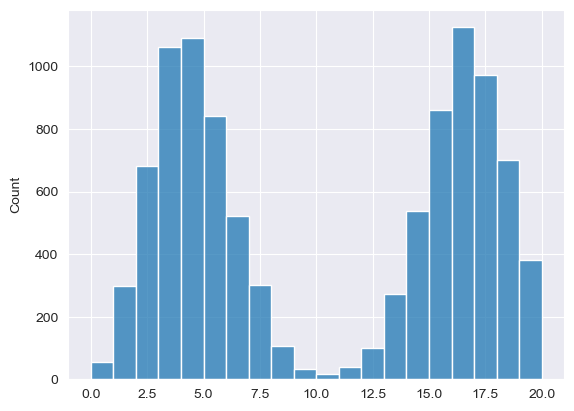

In [39]:
class Question2a:
    n_samples = 5000
    np.random.seed(0)

    x1 = X1.rvs(size=n_samples)
    x2 = X2.rvs(size=n_samples)
    x12 = np.concatenate((x1, x2), axis=0)

    ks = range(0, n)
    sns.histplot(x12, bins=n)


Question2a().x12

In [40]:
grader.check("Question 2a")

Question 2a results: All test cases passed!

### 2b) (4 points)

Calculate the mean, median, and the first two modes of the concatenated samples (from Question 2a), and store them in the variables 'mean', 'median', 'mode1', and 'mode2', respectively.

Hint: You can use np.unique and np.argsort to find the first and the second modes

In [41]:
class Question2b:
    x12 = Question2a().x12

    mean_x12 = np.mean(x12)
    median_x12 = np.median(x12)

    vals, counts = np.unique(x12, return_counts=True)
    idxes = np.argsort(counts)

    mode1_x12 = vals[idxes[-1]]
    mode2_x12 = vals[idxes[-2]]

    print(
        'Mean: {:.2f} \nMedian: {:.2f} \nFirst mode: {:.2f}\nSecond mode: {:.2f}'.format(
            mean_x12, median_x12, mode1_x12, mode2_x12))

Mean: 10.01 
Median: 10.00 
First mode: 16.00
Second mode: 4.00


In [42]:
grader.check("Question 2b")

Question 2b results: All test cases passed!

Which of these estimates (mean, median and modes) is more suitable to better represent this particular type of data? Why?

Your answer: The modes are best suited as the dataset is bimodal

## Question 3 (3 points)

### Normal distribution:
A normal (Gaussian) distribution is a type of continuous probability distribution characterized by a bell-shaped curve and defined by its mean $\mu$ and standard deviation $\sigma$:
$$
    p(y) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(y - \mu)^2}{2\sigma^2}}
$$
We let $Y$ denote a random variable following this distribution.

In [43]:
mu = 3.0
sigma = 2.0
Y = stats.norm(loc=mu, scale=sigma)

# Please check this page for more information: 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

### 3a) (1 point)
Generate 10,000 independent samples in a variable named 'y'.

Visualize the distribution of the data plot using an histogram. Add a smooth curve obtained using a kernel density estimate (KDE) to the histogram.

Hint: you can use sns.histplot.

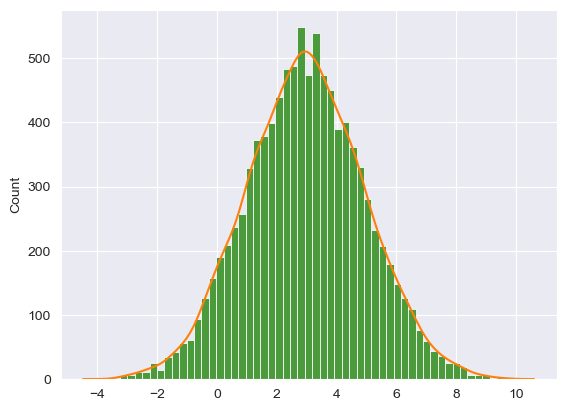

In [44]:
class Question3a:
    n_samples = 10000
    np.random.seed(0)

    y = Y.rvs(size=n_samples)

    sns.histplot(data=y)
    sns.histplot(data=y, kde=True)

    sns.histplot(y)

In [45]:
grader.check("Question 3a")

Question 3a results: All test cases passed!

### 3b) (1 point, bonus)
Calculate the probabilities $\text{P}(Y = 2)$, $\text{P}(Y = 3)$ and $\text{P}(Y = 4)$ and store them in the variables 'p2', 'p3', and 'p4', respectively.


In [46]:
class Question3b:
    p2 = 0
    p3 = 0
    p4 = 0

    print('P(Y=2)={:.4f} \nP(Y=3)={:.4f} \nP(Y=4)={:.4f}'.format(p2, p3, p4))


Question3a().y

P(Y=2)=0.0000 
P(Y=3)=0.0000 
P(Y=4)=0.0000


array([6.52810469, 3.80031442, 4.95747597, ..., 4.03374436, 2.93415861,
       5.59622286])

In [47]:
grader.check("Question 3b")

Question 3b results: All test cases passed!

### 3c) (1 point)
Calculate the probabilities $\text{P}(Y \leq 2)$, $\text{P}(2 < Y \leq 3)$ and $\text{P}(Y \geq 4)$ and store them in the variables 'p_le2', 'p_gr2_le3', and 'p_gr4', respectively.


In [48]:
class Question3c:
    p_le2 = Y.cdf(2)
    p_gr2_le3 = Y.sf(2) - Y.cdf(3)
    p_gr4 = Y.sf(4)

    print('P(Y<=2)={:.4f}\nP(2<Y<=3)={:.4f}\nP(Y>=4)={:.4f}'.format(p_le2,
                                                                    p_gr2_le3,
                                                                    p_gr4))

P(Y<=2)=0.3085
P(2<Y<=3)=0.1915
P(Y>=4)=0.3085


In [49]:
grader.check("Question 3c")

Question 3c results: All test cases passed!

Do the probabilities $\text{P}(Y \leq 2)$ and $\text{P}(Y \geq 4)$ have the same value? What is the reason for your answer?

Your answer: Yes, as their limiting values have the same distance from 3.

### 3d) (1 point)

Calculate the mean, standard deviation, and median of the samples generated in the variable 'y' (Question 3a) and store them in the variables 'mean', 'std' and 'median' respectively.

In [50]:
class Question3d:
    mean_y = np.mean(Question3a().y)
    std_y = np.std(Question3a().y)
    median_y = np.median(Question3a().y)

    print('Mean={:.4f} \nStd={:.4f} \nMedian={:.4f}'.format(mean_y, std_y,
                                                            median_y))

Mean=2.9631 
Std=1.9751 
Median=2.9459


In [51]:
grader.check("Question 3d")

Question 3d results: All test cases passed!

Are the mean and the standard deviation close to the $\mu$ and $\sigma$? How about the median? Why?

Your answer: Mu defines the mean in a normal distribution, which should fall together with the median. Sigma is defined as the standard deviation.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [52]:
grader.check_all()

Question 1a results: All test cases passed!

Question 1b results: All test cases passed!

Question 1c results: All test cases passed!

Question 1d results: All test cases passed!

Question 2a results: All test cases passed!

Question 2b results: All test cases passed!

Question 3a results: All test cases passed!

Question 3b results: All test cases passed!

Question 3c results: All test cases passed!

Question 3d results: All test cases passed!